In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import time
import seaborn as sns 
%matplotlib inline

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [3]:
# glance the head of training set
train.head()

,row_id,x,y,accuracy,time,place_id
0,0,0.7941,9.0809,54,470702,8523065625
1,1,5.9567,4.7968,13,186555,1757726713
2,2,8.3078,7.0407,74,322648,1137537235
3,3,7.3665,2.5165,65,704587,6567393236
4,4,4.0961,1.1307,31,472130,7440663949


In [4]:
# np.histogram() returns two values - 
# 1 - number of occurances within each histogram bucket/bin
# 2 - cutoff values for each histogram bucket/bin, if there were N buckets/bins there'd be N+1 cutoff values

train_acc_count, train_acc_bin_cutoff = np.histogram(train["accuracy"], bins=50)
# calculate fraction/proportion of occurances of values in each bin against full count of occurances
train_acc_fraction = train_acc_count/(train_acc_count.sum()*1.0)

test_acc_count, test_acc_bin_cutoff = np.histogram(test["accuracy"], bins=50)
test_acc_fraction = test_acc_count/(test_acc_count.sum()*1.0)

print train_acc_count.shape
print train_acc_count
print train_acc_bin_cutoff.shape
print train_acc_bin_cutoff

(50,)
[6344126 2923252 5419190 8456119  826674  406155  315107 1586796 1098104
  283008  147612  101843   97979   78424   78253   58077   49855   48801
   45908   50895   37476   32849   28697   30762   32497   27532   26501
   24355   24531   23571   22301   22535   22310   21280   21496   21210
   20543   21899   22042   21906   21689   19976   22656   37586   23565
   19662   21373   19827    9022     194]
(51,)
[  1.00000000e+00   2.16400000e+01   4.22800000e+01   6.29200000e+01
   8.35600000e+01   1.04200000e+02   1.24840000e+02   1.45480000e+02
   1.66120000e+02   1.86760000e+02   2.07400000e+02   2.28040000e+02
   2.48680000e+02   2.69320000e+02   2.89960000e+02   3.10600000e+02
   3.31240000e+02   3.51880000e+02   3.72520000e+02   3.93160000e+02
   4.13800000e+02   4.34440000e+02   4.55080000e+02   4.75720000e+02
   4.96360000e+02   5.17000000e+02   5.37640000e+02   5.58280000e+02
   5.78920000e+02   5.99560000e+02   6.20200000e+02   6.40840000e+02
   6.61480000e+02   6.8212000

[ 8 -6  1  1]
[-14   7   0]


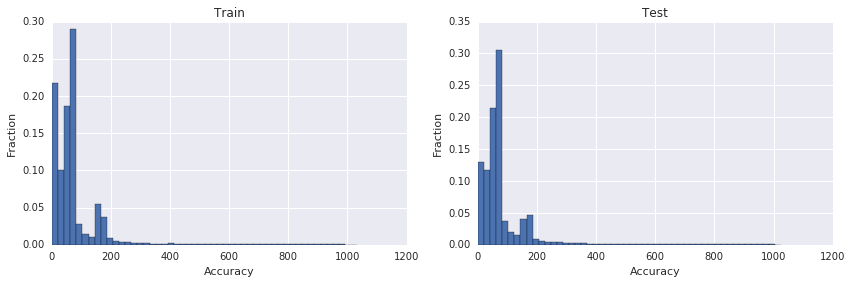

In [5]:
# numpy.diff() calculates step-wise element value differences along given axis
# if call numpy.diff() with higher n, numpy.diff() will call itself recursively with result generated from previous call
x = np.array([1, 9, 3, 4, 5])
print np.diff(x)
print np.diff(x, n = 2)

# calculates width of each histogram bin/bucket
train_acc_bin_width = np.diff(train_acc_bin_cutoff)
test_acc_bin_width = np.diff(test_acc_bin_cutoff)

# matplotlib.pyplot.bar(left, height, width=0.8, bottom=None, hold=None, data=None, **kwargs)
# Makes a bar plot with rectangles bounded by:
# left, left + width, bottom, bottom + height
# (left, right, bottom and top edges)
plt.figure(0, figsize=(14,4))

plt.subplot(121)
plt.bar(train_acc_bin_cutoff[:-1], train_acc_fraction, width = train_acc_bin_width)
plt.grid(True)
plt.xlabel("Accuracy")
plt.ylabel("Fraction")
plt.title("Train")

plt.subplot(122)
plt.bar(test_acc_bin_cutoff[:-1], test_acc_fraction, width = test_acc_bin_width)
plt.grid(True)
plt.xlabel("Accuracy")
plt.ylabel("Fraction")
plt.title("Test")

plt.show()

# From above plots - Accuracy distribution is pretty consistent among training and testing sets.

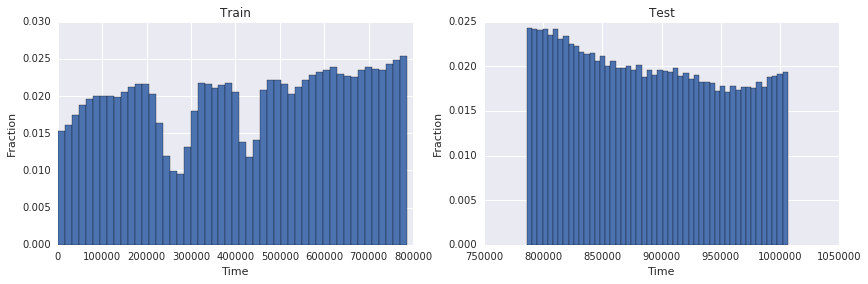

In [6]:
train_t_count, train_t_bin_cutoff = np.histogram(train["time"], bins=50)
# calculate fraction/proportion of occurances of values in each bin against full count of occurances
train_t_fraction = train_t_count/(train_t_count.sum()*1.0)

test_t_count, test_t_bin_cutoff = np.histogram(test["time"], bins=50)
test_t_fraction = test_t_count/(test_t_count.sum()*1.0)

# calculates width of each histogram bin/bucket
train_t_bin_width = np.diff(train_t_bin_cutoff)
test_t_bin_width = np.diff(test_t_bin_cutoff)

plt.figure(0, figsize=(14,4))

plt.subplot(121)
plt.bar(train_t_bin_cutoff[:-1], train_t_fraction, width = train_t_bin_width)
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Fraction")
plt.title("Train")

plt.subplot(122)
plt.bar(test_t_bin_cutoff[:-1], test_t_fraction, width = test_t_bin_width)
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Fraction")
plt.title("Test")

plt.show()

# Per Competition Rule, training set and testing set are in chronological order - train followed by test, Hence let's concatenate the two plots of time

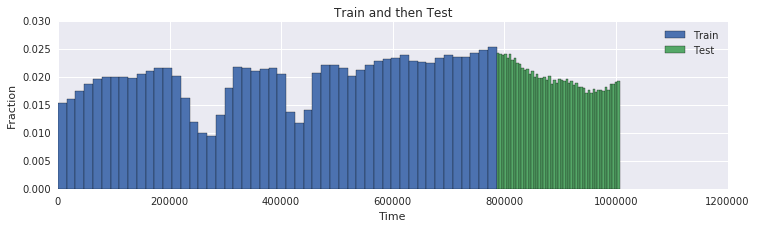

In [7]:
current_palette = sns.color_palette()

plt.figure(2, figsize=(12,3))
plt.bar(train_t_bin_cutoff[:-1], train_t_fraction, width = train_t_bin_width, color = current_palette[0], label = "Train")
plt.bar(test_t_bin_cutoff[:-1], test_t_fraction, width = test_t_bin_width, color = current_palette[1], label = "Test")

plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Fraction")
plt.title("Train and then Test")
plt.legend()
plt.show()

# Now see the number of occurances for places

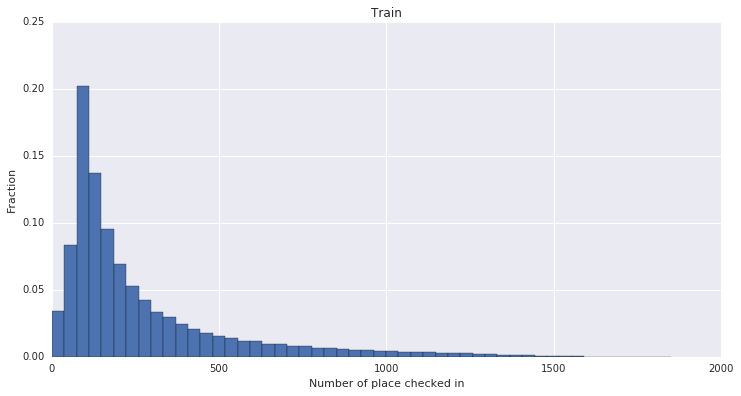

In [8]:
# pandas.Series.value_counts() return counts of unique values in Series, in descending order
placeCheckedCount = train["place_id"].value_counts()

train_placeCheckedCount_count, train_placeCheckedCount_bin_cutoff = np.histogram(placeCheckedCount, bins=50)
# calculate fraction/proportion of occurances of values in each bin against full count of occurances
train_placeCheckedCount_fraction = train_placeCheckedCount_count/(train_placeCheckedCount_count.sum()*1.0)

# calculates width of each histogram bin/bucket
train_placeCheckedCount_bin_width = np.diff(train_placeCheckedCount_bin_cutoff)

plt.figure(3, figsize=(12,6))
plt.bar(train_placeCheckedCount_bin_cutoff[:-1], train_placeCheckedCount_fraction, width = train_placeCheckedCount_bin_width)
plt.grid(True)
plt.xlabel("Number of place checked in")
plt.ylabel("Fraction")
plt.title("Train")
plt.show()

# Relationship between places and times

In [9]:
# Get a list of the top 20 places checked in
df_topPlaces = placeCheckedCount.iloc[0:20]
l_topPlaces = list(df_topPlaces.index)
print(l_topPlaces)

[8772469670, 1623394281, 1308450003, 4823777529, 9586338177, 9129780742, 9544215131, 5351837004, 4638096372, 8610202964, 6051554924, 7363774279, 8607353836, 8336299754, 5204012807, 7230349735, 7985287621, 4371034975, 4993591840, 7348940462]


# The following plots take the most frequent checked-in placed, and -
1. take the min/max of the entire time range for training set
2. break the entire time range into 50 buckets
3. count the number of check-ins for placed within each of the 50 buckets
4. generate histogram using above data

# The plots will show within the entire time range while collecting training data, what's the check-in pattern for the 20 places.

None


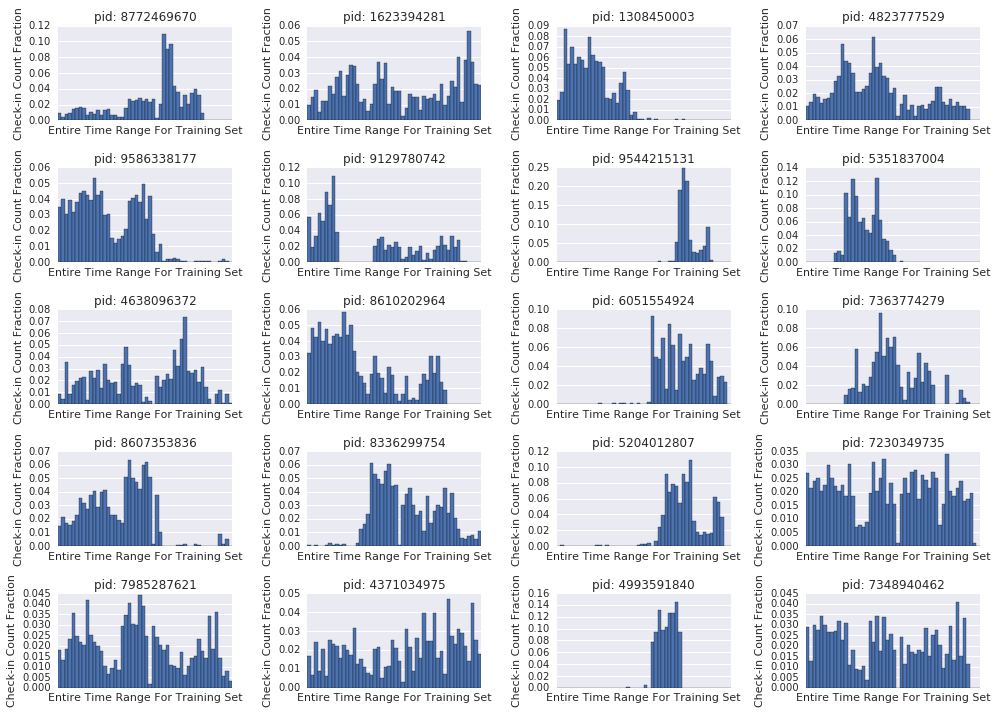

In [17]:
plt.figure(6, figsize=(14,10))
for i in range(len(l_topPlaces)):
    pid = l_topPlaces[i]

    df_place = train[train["place_id"] == pid] # top places in the itration list

    # plot histogram to count for each time range (bucket), how many check-ins happen at placd_id = pid
    # time range (min, max) of histogram buckets uses min, max time of the entire training set
    pid_checkin_count, time_range = np.histogram(df_place["time"], bins = 50, range = [train["time"].min(), train["time"].max()])
    pid_checkin_count_fraction = pid_checkin_count/(pid_checkin_count.sum()*1.0)

    # calculates width of each histogram bin/bucket
    pid_checkin_count_bin_width = np.diff(time_range)
    
    plt.subplot(5, 4, i+1)
    plt.bar(time_range[:-1], pid_checkin_count_fraction, width = pid_checkin_count_bin_width)
    plt.xlim(train["time"].min(), train["time"].max())
    plt.grid(True)
    plt.xlabel("Entire Time Range in Training Set")
    plt.ylabel("Check-in Count Fraction")
    plt.gca().get_xaxis().set_ticks([])
    plt.title("pid: " + str(pid))
    
print df_place.columns.name # with all columns from training set - but for one single place_id only
plt.tight_layout()
plt.show()

# I'll create a separate ipynb for identifying timestamp unit - it's in minutes, so:
1. first convert the timestamps into minutes within a day (always ranging from 00:00 to 23:59), as our buckets
2. count the number of check-ins within the buckets (minutes in a day), among all days
3. plot histogram - to observer the check-in pattern for these 20 places within a 24 hr day.

Also we knows that we have about 555 days in training set and about 140 days in testing set

# Since we now know the timestamp unit, we can also observe "day in week" check-in pattern or "week in month" check-in pattern - and so on.

# Another note is, we don't know when data gathering/recording starts - so the first minute time stamp could be 00:00 on Sunday, or could be anyother time spot in any day of the week - this needs to be kept in mind

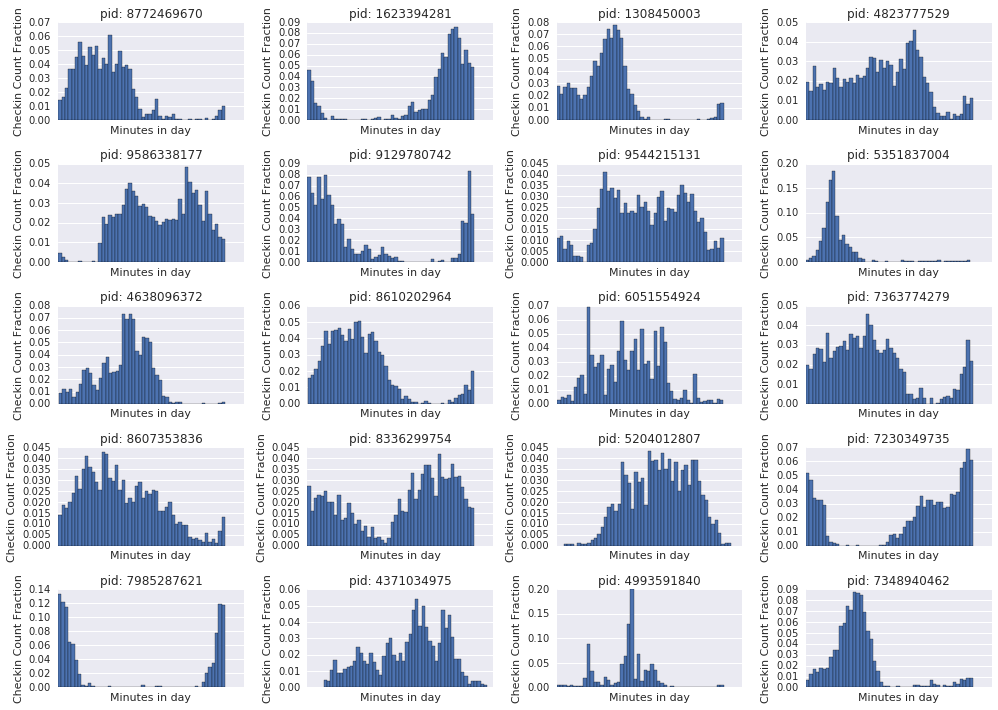

In [16]:
plt.figure(7, figsize=(14,10))
for i in range(len(l_topPlaces)):
    pid = l_topPlaces[i]

    df_place = train[train["place_id"] == pid]

    # modulo - % 60*24 to convert time column into minutes in day, hence always range from 00:00 to 23:59
    checkin_count, minutes_in_day = np.histogram(df_place["time"]%(60*24), bins=50)
    checkin_count_fraction = checkin_count/(checkin_count.sum()*1.0)
    
    plt.subplot(5,4,i+1)
    plt.bar(minutes_in_day[:-1], checkin_count_fraction, width = np.diff(minutes_in_day))
    plt.grid(True)
    plt.xlabel("Minutes in day")
    plt.ylabel("Checkin Count Fraction")
    plt.gca().get_xaxis().set_ticks([])
    plt.title("pid: " + str(pid))
    
plt.tight_layout()
plt.show()


# Let's look at location coordinates now

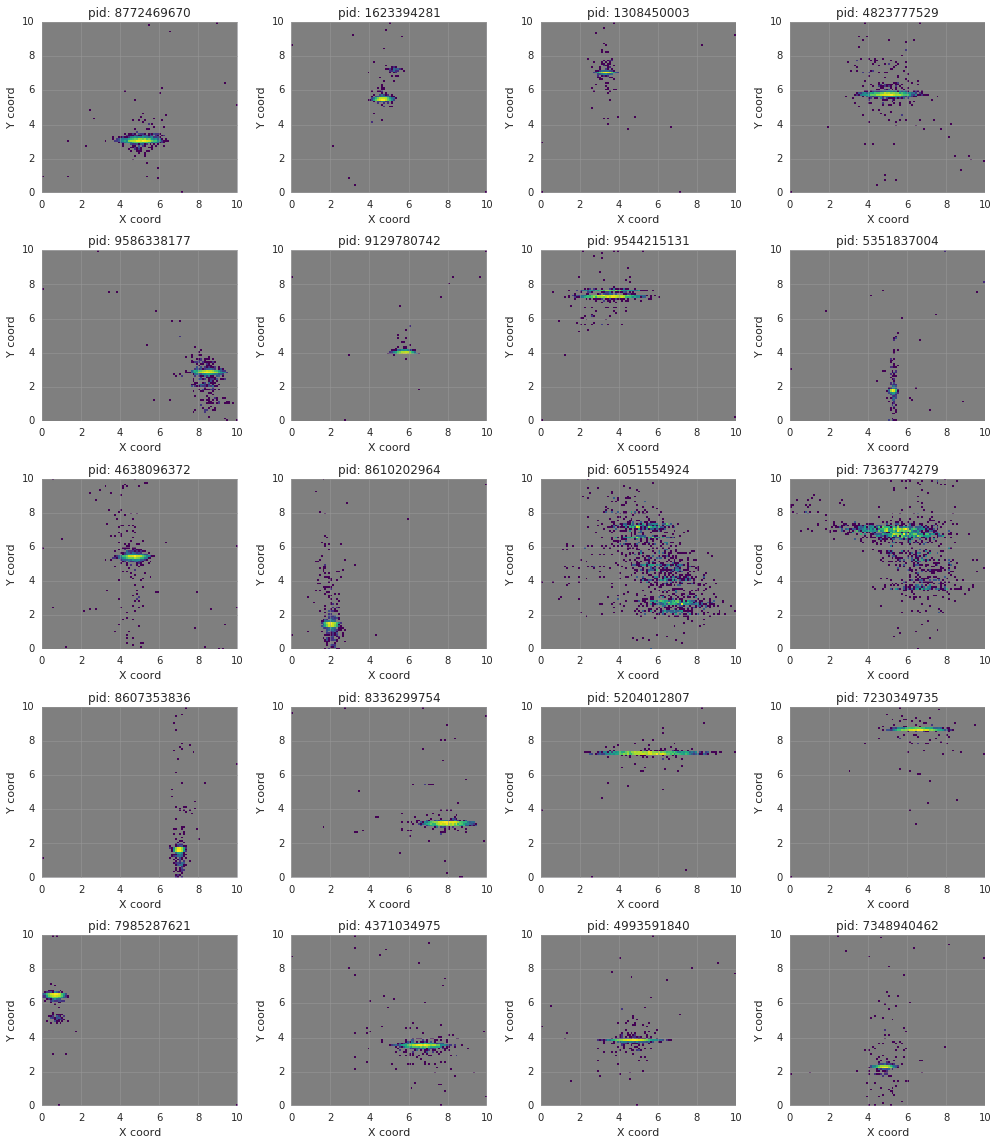

In [20]:
# Check the 2d distribution of (x,y) for the top 20 places
plt.figure(8, figsize=(14,16))
cmapm = plt.cm.viridis
cmapm.set_bad("0.5",1.)

for i in range(len(l_topPlaces)):
    pid = l_topPlaces[i]
    df_place = train[train["place_id"] == pid]
    counts, binsX, binsY = np.histogram2d(df_place["x"], df_place["y"], bins = 100)
    extent = [train["x"].min(),train["x"].max(),train["y"].min(),train["y"].max()]#range of histogram same as range of whole map

    plt.subplot(5,4,i+1)
    plt.imshow(np.log10(counts), # take log10() for counts for easier visualization (like zooming in)
               interpolation = 'none',
               origin = 'lower',
               extent = extent,
               aspect = "auto",
               cmap = cmapm)
    plt.grid(True, c = '0.6', lw = 0.5)
    plt.xlabel("X coord")
    plt.ylabel("Y coord")
    plt.title("pid: " + str(pid))

plt.tight_layout()
plt.show()